# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
appl = pd.read_csv('appl_1980_2014.csv')
appl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

In [5]:
appl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [6]:
appl.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [8]:
appl.Date = pd.to_datetime(appl.Date,format = '%Y/%m/%d')

In [9]:
appl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [11]:
appl.set_index(['Date'],inplace = True)
appl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [15]:
appl.index[appl.index.duplicated()]
appl.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [17]:
appl.sort_index(inplace = True,ascending = True)
appl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

<table class="colwidths-given table">
<colgroup>
<col style="width: 16%">
<col style="width: 16%">
<col style="width: 68%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Date Offset</p></th>
<th class="head"><p>Frequency String</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.DateOffset.html#pandas.tseries.offsets.DateOffset" title="pandas.tseries.offsets.DateOffset"><code class="xref py py-class docutils literal notranslate"><span class="pre">DateOffset</span></code></a></p></td>
<td><p>None</p></td>
<td><p>Generic offset class, defaults to absolute 24 hours</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BDay.html#pandas.tseries.offsets.BDay" title="pandas.tseries.offsets.BDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">BDay</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessDay.html#pandas.tseries.offsets.BusinessDay" title="pandas.tseries.offsets.BusinessDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessDay</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'B'</span></code></p></td>
<td><p>business day (weekday)</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CDay.html#pandas.tseries.offsets.CDay" title="pandas.tseries.offsets.CDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">CDay</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessDay.html#pandas.tseries.offsets.CustomBusinessDay" title="pandas.tseries.offsets.CustomBusinessDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessDay</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'C'</span></code></p></td>
<td><p>custom business day</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Week.html#pandas.tseries.offsets.Week" title="pandas.tseries.offsets.Week"><code class="xref py py-class docutils literal notranslate"><span class="pre">Week</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'W'</span></code></p></td>
<td><p>one week, optionally anchored on a day of the week</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.WeekOfMonth.html#pandas.tseries.offsets.WeekOfMonth" title="pandas.tseries.offsets.WeekOfMonth"><code class="xref py py-class docutils literal notranslate"><span class="pre">WeekOfMonth</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'WOM'</span></code></p></td>
<td><p>the x-th day of the y-th week of each month</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.LastWeekOfMonth.html#pandas.tseries.offsets.LastWeekOfMonth" title="pandas.tseries.offsets.LastWeekOfMonth"><code class="xref py py-class docutils literal notranslate"><span class="pre">LastWeekOfMonth</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'LWOM'</span></code></p></td>
<td><p>the x-th day of the last week of each month</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.MonthEnd.html#pandas.tseries.offsets.MonthEnd" title="pandas.tseries.offsets.MonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">MonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'M'</span></code></p></td>
<td><p>calendar month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.MonthBegin.html#pandas.tseries.offsets.MonthBegin" title="pandas.tseries.offsets.MonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">MonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'MS'</span></code></p></td>
<td><p>calendar month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BMonthEnd.html#pandas.tseries.offsets.BMonthEnd" title="pandas.tseries.offsets.BMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BMonthEnd</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessMonthEnd.html#pandas.tseries.offsets.BusinessMonthEnd" title="pandas.tseries.offsets.BusinessMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessMonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BM'</span></code></p></td>
<td><p>business month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BMonthBegin.html#pandas.tseries.offsets.BMonthBegin" title="pandas.tseries.offsets.BMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BMonthBegin</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessMonthBegin.html#pandas.tseries.offsets.BusinessMonthBegin" title="pandas.tseries.offsets.BusinessMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessMonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BMS'</span></code></p></td>
<td><p>business month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CBMonthEnd.html#pandas.tseries.offsets.CBMonthEnd" title="pandas.tseries.offsets.CBMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">CBMonthEnd</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessMonthEnd.html#pandas.tseries.offsets.CustomBusinessMonthEnd" title="pandas.tseries.offsets.CustomBusinessMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessMonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'CBM'</span></code></p></td>
<td><p>custom business month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CBMonthBegin.html#pandas.tseries.offsets.CBMonthBegin" title="pandas.tseries.offsets.CBMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">CBMonthBegin</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessMonthBegin.html#pandas.tseries.offsets.CustomBusinessMonthBegin" title="pandas.tseries.offsets.CustomBusinessMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessMonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'CBMS'</span></code></p></td>
<td><p>custom business month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.SemiMonthEnd.html#pandas.tseries.offsets.SemiMonthEnd" title="pandas.tseries.offsets.SemiMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">SemiMonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'SM'</span></code></p></td>
<td><p>15th (or other day_of_month) and calendar month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.SemiMonthBegin.html#pandas.tseries.offsets.SemiMonthBegin" title="pandas.tseries.offsets.SemiMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">SemiMonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'SMS'</span></code></p></td>
<td><p>15th (or other day_of_month) and calendar month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.QuarterEnd.html#pandas.tseries.offsets.QuarterEnd" title="pandas.tseries.offsets.QuarterEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">QuarterEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'Q'</span></code></p></td>
<td><p>calendar quarter end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.QuarterBegin.html#pandas.tseries.offsets.QuarterBegin" title="pandas.tseries.offsets.QuarterBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">QuarterBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'QS'</span></code></p></td>
<td><p>calendar quarter begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BQuarterEnd.html#pandas.tseries.offsets.BQuarterEnd" title="pandas.tseries.offsets.BQuarterEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BQuarterEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BQ</span></code></p></td>
<td><p>business quarter end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BQuarterBegin.html#pandas.tseries.offsets.BQuarterBegin" title="pandas.tseries.offsets.BQuarterBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BQuarterBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BQS'</span></code></p></td>
<td><p>business quarter begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.FY5253Quarter.html#pandas.tseries.offsets.FY5253Quarter" title="pandas.tseries.offsets.FY5253Quarter"><code class="xref py py-class docutils literal notranslate"><span class="pre">FY5253Quarter</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'REQ'</span></code></p></td>
<td><p>retail (aka 52-53 week) quarter</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.YearEnd.html#pandas.tseries.offsets.YearEnd" title="pandas.tseries.offsets.YearEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">YearEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'A'</span></code></p></td>
<td><p>calendar year end</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.YearBegin.html#pandas.tseries.offsets.YearBegin" title="pandas.tseries.offsets.YearBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">YearBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'AS'</span></code> or <code class="docutils literal notranslate"><span class="pre">'BYS'</span></code></p></td>
<td><p>calendar year begin</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BYearEnd.html#pandas.tseries.offsets.BYearEnd" title="pandas.tseries.offsets.BYearEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BYearEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BA'</span></code></p></td>
<td><p>business year end</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BYearBegin.html#pandas.tseries.offsets.BYearBegin" title="pandas.tseries.offsets.BYearBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BYearBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BAS'</span></code></p></td>
<td><p>business year begin</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.FY5253.html#pandas.tseries.offsets.FY5253" title="pandas.tseries.offsets.FY5253"><code class="xref py py-class docutils literal notranslate"><span class="pre">FY5253</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'RE'</span></code></p></td>
<td><p>retail (aka 52-53 week) year</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Easter.html#pandas.tseries.offsets.Easter" title="pandas.tseries.offsets.Easter"><code class="xref py py-class docutils literal notranslate"><span class="pre">Easter</span></code></a></p></td>
<td><p>None</p></td>
<td><p>Easter holiday</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessHour.html#pandas.tseries.offsets.BusinessHour" title="pandas.tseries.offsets.BusinessHour"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessHour</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BH'</span></code></p></td>
<td><p>business hour</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessHour.html#pandas.tseries.offsets.CustomBusinessHour" title="pandas.tseries.offsets.CustomBusinessHour"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessHour</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'CBH'</span></code></p></td>
<td><p>custom business hour</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Day.html#pandas.tseries.offsets.Day" title="pandas.tseries.offsets.Day"><code class="xref py py-class docutils literal notranslate"><span class="pre">Day</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'D'</span></code></p></td>
<td><p>one absolute day</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Hour.html#pandas.tseries.offsets.Hour" title="pandas.tseries.offsets.Hour"><code class="xref py py-class docutils literal notranslate"><span class="pre">Hour</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'H'</span></code></p></td>
<td><p>one hour</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Minute.html#pandas.tseries.offsets.Minute" title="pandas.tseries.offsets.Minute"><code class="xref py py-class docutils literal notranslate"><span class="pre">Minute</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'T'</span></code> or <code class="docutils literal notranslate"><span class="pre">'min'</span></code></p></td>
<td><p>one minute</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Second.html#pandas.tseries.offsets.Second" title="pandas.tseries.offsets.Second"><code class="xref py py-class docutils literal notranslate"><span class="pre">Second</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'S'</span></code></p></td>
<td><p>one second</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Milli.html#pandas.tseries.offsets.Milli" title="pandas.tseries.offsets.Milli"><code class="xref py py-class docutils literal notranslate"><span class="pre">Milli</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'L'</span></code> or <code class="docutils literal notranslate"><span class="pre">'ms'</span></code></p></td>
<td><p>one millisecond</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Micro.html#pandas.tseries.offsets.Micro" title="pandas.tseries.offsets.Micro"><code class="xref py py-class docutils literal notranslate"><span class="pre">Micro</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'U'</span></code> or <code class="docutils literal notranslate"><span class="pre">'us'</span></code></p></td>
<td><p>one microsecond</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Nano.html#pandas.tseries.offsets.Nano" title="pandas.tseries.offsets.Nano"><code class="xref py py-class docutils literal notranslate"><span class="pre">Nano</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'N'</span></code></p></td>
<td><p>one nanosecond</p></td>
</tr>
</tbody>
</table>

In [21]:
appl_month_end = appl.resample('BM').mean()
appl_month_end.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [27]:
(appl.index.max()-appl.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [30]:
len(appl_month_end)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

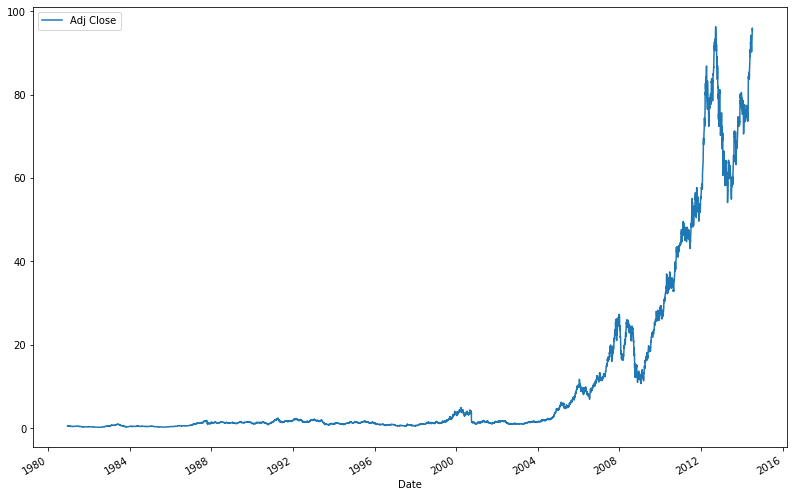

In [39]:
appl_plot = appl.plot.line(y = ['Adj Close'])
fig = appl_plot.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

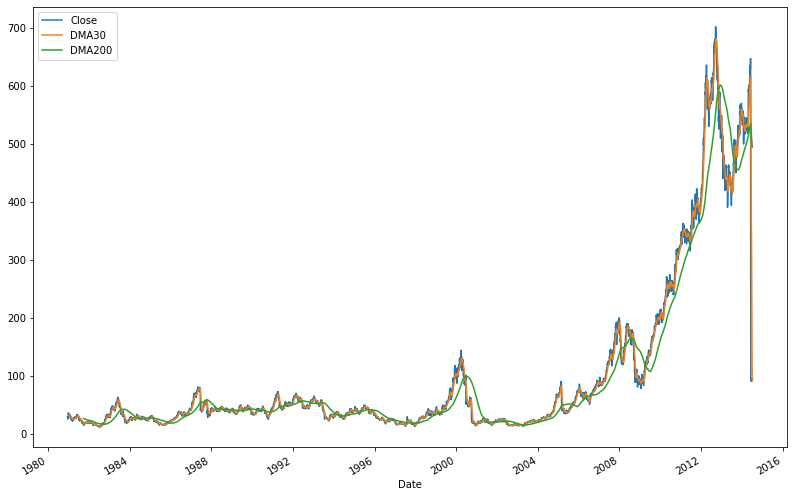

In [48]:
appl['DMA30'] = appl.Close.rolling(20).mean()
appl['DMA200'] = appl.Close.rolling(200).mean()
appl_plot = appl.plot.line(y = ['Close','DMA30','DMA200'])
fig = appl_plot.get_figure()
fig.set_size_inches(13.5, 9)